In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,classification_report

In [9]:
df_music = pd.read_csv("train.csv")
df_music.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [10]:
df_submission=pd.read_csv('submission.csv')
df_submission.head()

,Acoustic/Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [11]:
df_music.shape

(17996, 17)

In [12]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [13]:
# Descriptive Statistics of the Attributes
df_music.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [14]:
'''
classes=df_submission.columns.tolist()
class_retrieval={retrieve:n for retrieve,n in enumerate(classes,0)}
class_retrieval
'''

'\nclasses=df_submission.columns.tolist()\nclass_retrieval={retrieve:n for retrieve,n in enumerate(classes,0)}\nclass_retrieval\n'

In [15]:
#df_music['Class']=df_music.Class.map(class_retrieval)
#df_music.Class

<AxesSubplot:>

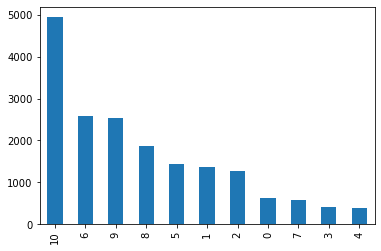

In [16]:
#Check the Class Distribution within the Class Attribute
df_music.Class.value_counts().plot.bar()

In [17]:
#Additional Features
df_music['Artist_Length'] = df_music['Artist Name'].apply(len) 
df_music['Artist_Char_Count'] = df_music['Artist Name'].str.split().str.len()     
df_music['Track_Length'] = df_music['Track Name'].apply(len)   
df_music['Track_Char_Count'] = df_music['Track Name'].str.split().str.len() 
df_music['Track_Digit'] = df_music['Track Name'].str.findall(r'[0-9]').str.len() 

In [18]:
df_music.sample(2)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,duration_in min/ms,time_signature,Class,Artist_Length,Artist_Char_Count,Track_Length,Track_Char_Count,Track_Digit
13404,Steve Hackett,Ace Of Wands - Remastered 2005,35.0,0.208,0.870,2.0,-8.141,1,0.0643,0.07590,...,0.182,83.831,323040.0,4,10,13,2,30,6,4
15432,Dumpstaphunk,United Nations Stomp (feat. Marcus King),44.0,0.392,0.897,11.0,-3.835,1,0.0992,0.00161,...,0.561,184.053,347000.0,4,2,12,1,40,6,0


In [19]:
df_music.drop(['Artist Name', 'Track Name'], axis=1,inplace=True)

In [20]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          17568 non-null  float64
 1   danceability        17996 non-null  float64
 2   energy              17996 non-null  float64
 3   key                 15982 non-null  float64
 4   loudness            17996 non-null  float64
 5   mode                17996 non-null  int64  
 6   speechiness         17996 non-null  float64
 7   acousticness        17996 non-null  float64
 8   instrumentalness    13619 non-null  float64
 9   liveness            17996 non-null  float64
 10  valence             17996 non-null  float64
 11  tempo               17996 non-null  float64
 12  duration_in min/ms  17996 non-null  float64
 13  time_signature      17996 non-null  int64  
 14  Class               17996 non-null  int64  
 15  Artist_Length       17996 non-null  int64  
 16  Arti

In [21]:
df_music.isnull().sum()

Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
Artist_Length            0
Artist_Char_Count        0
Track_Length             0
Track_Char_Count         0
Track_Digit              0
dtype: int64

In [22]:
knn_impute = KNNImputer(n_neighbors=7)

df_music['instrumentalness']=knn_impute.fit_transform(df_music[['instrumentalness']])
df_music['Popularity']=knn_impute.fit_transform(df_music[['Popularity']])
df_music['key']=knn_impute.fit_transform(df_music[['key']])

In [27]:
df_music.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
Artist_Length         0
Artist_Char_Count     0
Track_Length          0
Track_Char_Count      0
Track_Digit           0
dtype: int64

In [28]:
#df_numeric = df.select_dtypes(exclude ='object')

In [29]:
#Independent
X = df_music.iloc[:,df_music.columns!='Class'].values
#Dependent
y = df_music.iloc[:,df_music.columns=='Class'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train=y_train.ravel()

In [31]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
'''
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = column_name)

display(X_train)
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler=StandardScaler()\n\nX_train = scaler.fit_transform(X_train)\nX_train = pd.DataFrame(X_train, columns = column_name)\n\ndisplay(X_train)\n'

In [33]:
def Performance_Metrics(y_test,y_pred):
    print('-------------------PERFORMANCE METRICS-------------------')
    print("Accuracy:",100*accuracy_score(y_test, y_pred))
    print('F1 score:', 100*f1_score(y_test, y_pred,average='weighted'))
    print('Recall:', 100*recall_score(y_test, y_pred,average='weighted'))
    print('Precision:', 100*precision_score(y_test, y_pred, average='weighted'))
    print('---------------------------------------------------------')

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#Grid search KNN 
parameters = {'n_neighbors':[1, 10]}
neigh = KNeighborsClassifier()
grid_neigh = GridSearchCV(neigh, parameters)
grid_neigh.fit(X_train, y_train) 
Y_pred=grid_neigh.predict(X_test)
accuracy=grid_neigh.score(X_test,y_test)
Performance_Metrics(y_test,Y_pred)

-------------------PERFORMANCE METRICS-------------------
Accuracy: 45.611111111111114
F1 score: 44.82927294536096
Recall: 45.611111111111114
Precision: 44.809731979942654
---------------------------------------------------------


In [35]:
# Building the model using RandomForestClassifier
rf  = RandomForestClassifier(random_state=60)
rf.fit(X_train,y_train)
rf.feature_importances_
predict_train = rf.predict(X_train)
y_pred_rf= rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred_rf)
accu=accuracy_score(y_test,y_pred_rf)*100
print(f"Training accuracy score: {accuracy_score(y_train, predict_train)*100:2.4}%")
print(f'Testing accuracy score:{accu:0.2f}')
print(classification_report(y_test,y_pred_rf))
#Performance_Metrics(y_test,y_pred_rf)

Training accuracy score: 92.25%
Testing accuracy score:51.58
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       132
           1       0.06      0.03      0.04       258
           2       0.52      0.40      0.45       266
           3       0.90      0.78      0.84        83
           4       0.77      0.72      0.75        79
           5       0.73      0.70      0.71       324
           6       0.30      0.23      0.26       514
           7       0.93      0.92      0.92       118
           8       0.61      0.52      0.56       343
           9       0.56      0.56      0.56       514
          10       0.44      0.60      0.51       969

    accuracy                           0.52      3600
   macro avg       0.59      0.58      0.58      3600
weighted avg       0.50      0.52      0.50      3600

